# Exercise 1a

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 20.11.2020, 16:00.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

# 1 Monte-Carlo Simulation

In the lecture, we considered the following toy problem: The feature variable $X \in [0, 1]$ is real-valued
and 1-dimensional, and the response $Y \in \{0, 1\}$ is discrete with two classes. The prior probabilities
and likelihoods are given by
\begin{align*}
p(Y = 0) = p(Y &= 1) = \frac{1}{2} \,, \\
p(X = x \vert Y = 0) &= 2 - 2x \,, \\
p(X = x \vert Y = 1) &= 2x \,.
\end{align*}

We also derived theoretical error rates of the Bayes and nearest neighbor classifiers for this problem. Monte Carlo simulation is a powerful method to verify the correctness of theoretical results
experimentally.

## 1.1 Data Creation and Visualization (7 points)

Since the given model is generative, one can create data using a random number generator. Specifically, one first samples an instance label $Y$ according to the prior probabilities, and then uses the
corresponding likelihood to sample the feature $X$. If no predefined random generator for the desired
likelihood is available (as is the case here), uniformly distributed samples from a standard random
number generator can be transformed to the desired distribution by means of "inverse transform
sampling" (see https://en.wikipedia.org/wiki/Inverse_transform_sampling).

Work out the required transformation formulas for our likelihoods and show your derivation in a
Markdown cell. Then implement a function that returns the $X$-values and corresponding $Y$-labels for $N$ data instances. Use the module
numpy.random to generate random numbers. Check that the data have the correct distribution
with matplotlib (see https://matplotlib.org/gallery/statistics/hist.html for a demo).

### Derivation:

We have the given likelihoods: $p(X=x \vert Y=0) = 2 - 2x$ and $p(X=x \vert Y=1) = 2x$. 

From these we can construct the cumulative distribution functions by integration:
\begin{align*}
F_x(Y = 0) &= 2x - x^2 \,, \\ 
F_x(Y = 1) &= x^2 \,.
\end{align*}

Inverting those functions, one gets the distribution for $X$:
\begin{align*}
X(Y = 0) &= F^{-1}_x(Y = 0) = 1 - \sqrt{1-u} \,, \\ 
X(Y = 1) &= F^{-1}_x(Y = 1) = \sqrt{u} \,,
\end{align*}
where $u \in [0,1]$ is a random variable. 

In [2]:
def create_data(N):
    # Create N uniformly distributed random numbers
    U = np.random.rand(N)
    
    # Get the X variables with the respective distribution
    X0 = 1 - np.sqrt(1-U)
    X1 = np.sqrt(U)
    
    # Create N random numbers 0 or 1 with probability 0.5
    Y = np.random.rand(N)
    Y[Y < 0.5] = 0
    Y[Y >= 0.5] = 1
    
    # Pick a random X0 when Y=0
    # Pick a random X1 when Y=1
    X = X0
    X[Y == 1] = X1[Y == 1]

    return [X, Y]

(array([[ 4.,  6.,  3.,  3.,  9.,  2., 10.,  6.,  5.,  2.],
        [24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

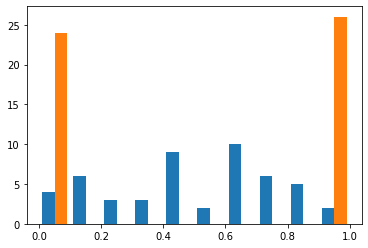

In [3]:
plt.hist(create_data(50))